###SARIMAX

In [ ]:
from datetime import datetime
custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M")

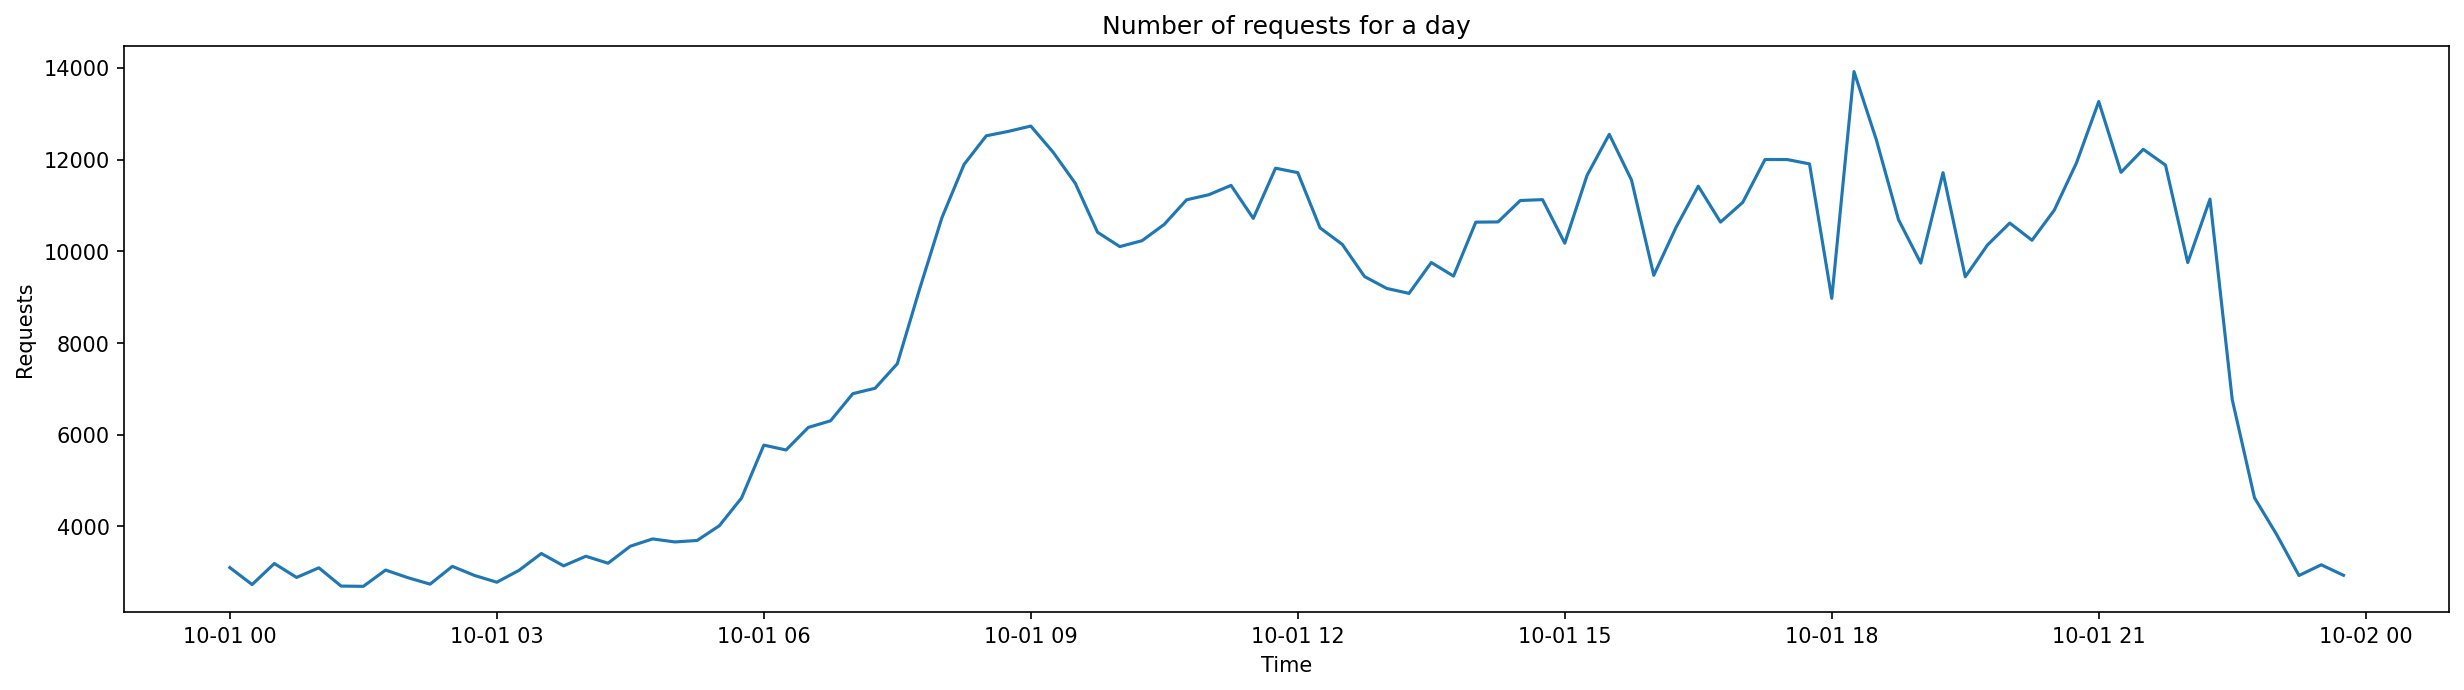

In [ ]:
#import pandas
import pandas as pd
series = pd.read_csv('/content/allapt_allmonth - Copy (2) - Copy.csv', parse_dates=['timeOfData'], date_parser=custom_date_parser)
df = series[0:96]

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5), dpi=150)
plt.plot(df.timeOfData, df.Total, color='tab:blue')
plt.gca().set(title='Number of requests for a day', 
xlabel='Time', ylabel='Requests')
plt.show()

In [ ]:
#import pandas
import pandas as pd
series = pd.read_csv('/content/allapt_allmonth - Copy (2) - Copy.csv', parse_dates=['timeOfData'], date_parser=custom_date_parser)
df = series

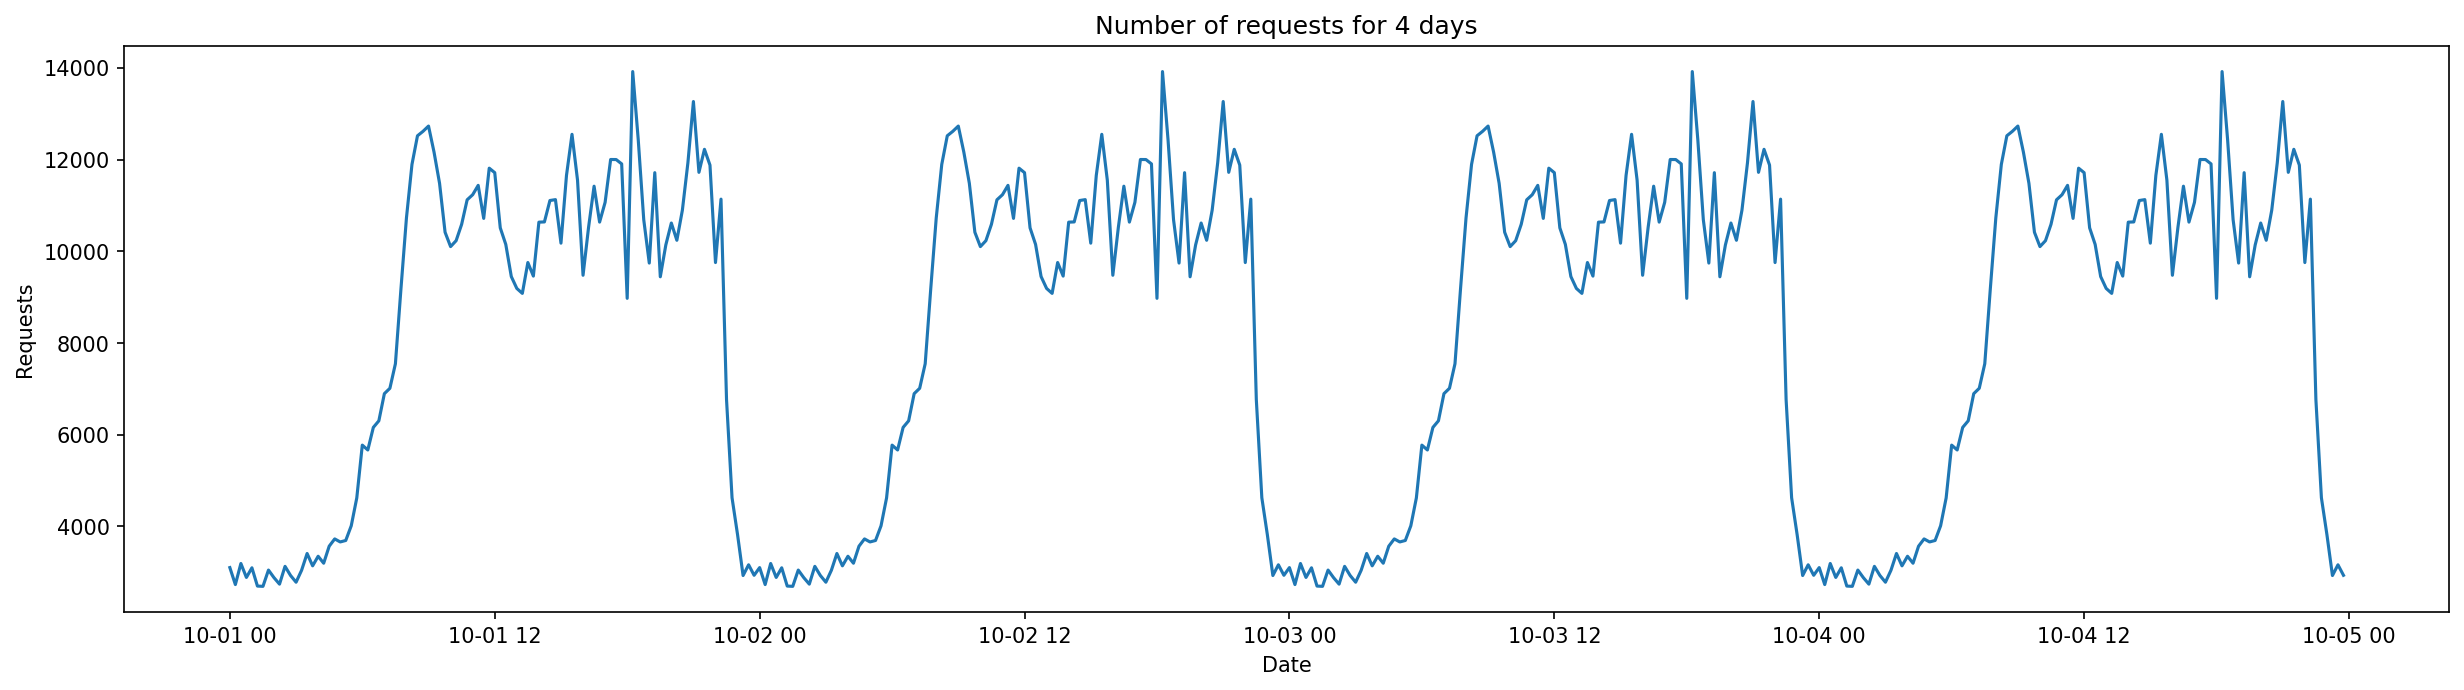

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5), dpi=150)
plt.plot(df.timeOfData, df.Total, color='tab:blue')
plt.gca().set(title='Number of requests for 4 days', 
xlabel='Date', ylabel='Requests')
plt.show()

In [ ]:
dftotal_mean = df.Total.rolling(window=15).mean()
dftotal_mean.plot(figsize=(20, 10), linewidth=2, y='Degree(Fahrenheit)',
color='tab:blue', title='Temperature in Sri lanka 2016 to 2020')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(df.Total,
model='additive', extrapolate_trend='freq', freq=15)
plt.rcParams.update({'figure.figsize': (20, 10)})
result_add.plot().suptitle('', fontsize=15)
plt.show()

In [ ]:
import itertools

p = d = q = range(0, 2)
#generate patterns from p,q,r
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 96) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for SARIMA..')
print('SARIMAX: {} * {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} * {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} * {}'.format(pdq[2], seasonal_pdq[2]))
print('SARIMAX: {} * {}'.format(pdq[3], seasonal_pdq[2]))

Examples of parameter combinations for SARIMA..
SARIMAX: (0, 0, 1) * (0, 0, 1, 96)
SARIMAX: (0, 0, 1) * (0, 0, 1, 96)
SARIMAX: (0, 1, 0) * (0, 1, 0, 96)
SARIMAX: (0, 1, 1) * (0, 1, 0, 96)


In [ ]:
import warnings
import statsmodels.api as sm

warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(
                one_step_df.AvgTemperature_actual,
                order=param, seasonal_order=param_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}*{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
train = df[0:288]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timeOfData  288 non-null    datetime64[ns]
 1   Total       288 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.6 KB


In [ ]:
test = df[288:]
test.info()

In [ ]:
train.tail()

In [ ]:
df.set_index('timeOfData',inplace=True)

In [ ]:
train.set_index('timeOfData',inplace=True)

In [ ]:
test.set_index('timeOfData',inplace=True)

In [ ]:
series = pd.read_csv('/content/allapt_allmonth - Copy (4) - Copy - Copy.csv')
df = series

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.feature_selection import RFE

In [ ]:
train_x1 = df['timeOfData']
train_y1 = df['Total']
train_x = train_x1[0:288]
train_y = train_y1[0:288]
test_x =  train_x1[288:]
test_y =  train_y1[288:]

In [ ]:
rfe = RandomForestRegressor(n_estimators=100)
fit = rfe.fit(train_x.values.reshape(-1,1), train_y)
y_pred = fit.predict(test_x.values.reshape(-1,1))


<built-in method all of numpy.ndarray object at 0x7fbe5e0ed750>


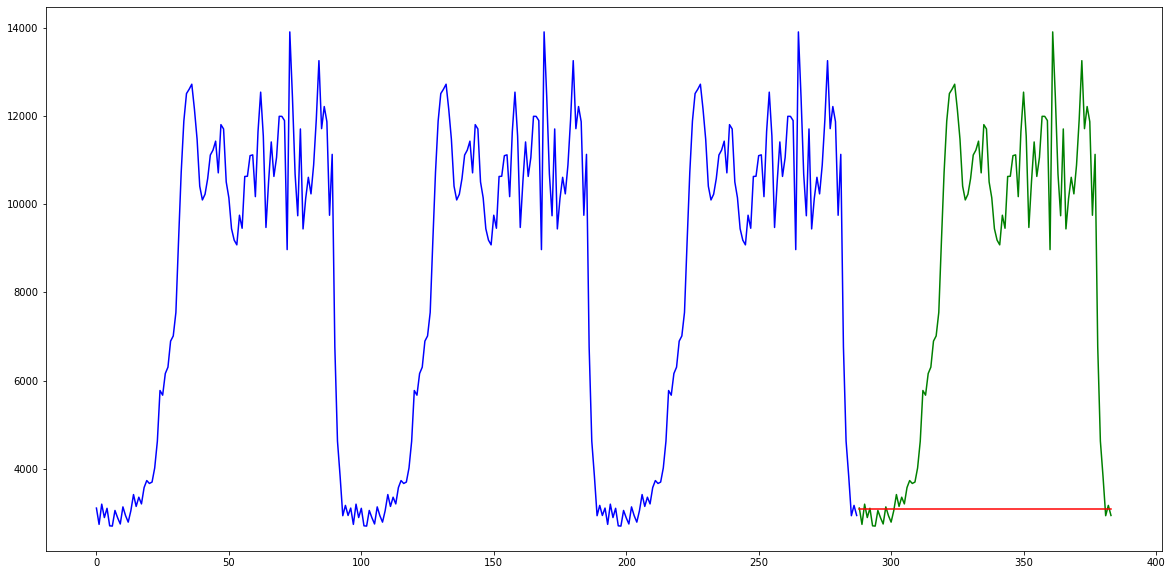

In [ ]:
plt.plot(train_x, train_y, color = 'blue')
plt.plot(test_x, test_y, color = 'green')
plt.plot(test_x, fit.predict(test_x.values.reshape(-1,1)), color = 'red')

plt.show()

AttributeError: ignored

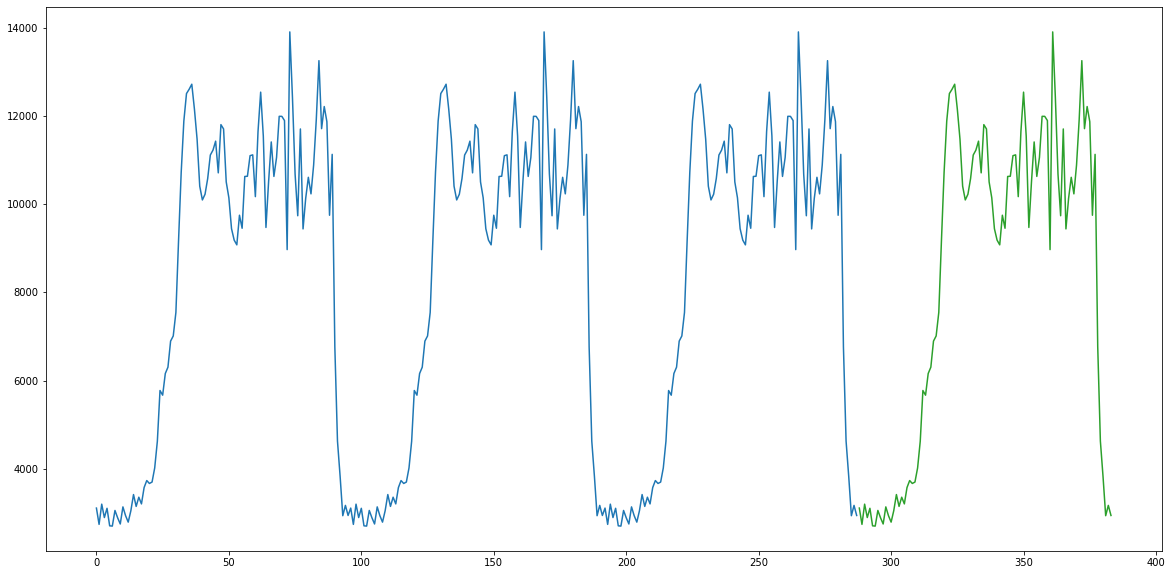

In [ ]:
ax = train_y.plot(label='Actual Training', color='tab:blue')
ax = test_y.plot(label='Actual Testing', color='tab:green')
y_pred.plot(ax=ax, label='Forecast', color='tab:red')


ax.set_xlabel('Date')
ax.set_ylabel('Requests')
plt.legend()
plt.show()

In [ ]:
pred = results.forecast(steps=38)
#pred_ci = pred.conf_int()
print(pred)

NameError: ignored

In [ ]:
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt

def evaluate_model(y, repeats): # Return factorial
    y = df["Total"]
    y = y.astype('float32')
    kf = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    for train_index, test_index in kf.split(y):
        train, test = y[train_index], y[test_index]
    
    test1 = test[0:38]
    #print(test1)
    mod = sm.tsa.statespace.SARIMAX(
    df,
    order=(1, 1, 1), seasonal_order=(1, 0, 1, 96),
    enforce_stationarity=False,
    enforce_invertibility=False)
    results = mod.fit()
    pred = results.forecast(steps=38)
    mape = np.mean(np.abs(pred - test1.values)/np.abs(test1.values))
    mae = np.mean(np.abs(pred - test1.values)) 
    rmse = np.mean((pred - test1.values)**2)**.5
    #print(mape)
    return({'mape':mape, 'mae': mae, 
            'rmse':rmse})

In [ ]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
import numpy as np

y = df["Total"]
y = y.astype('float32')

repeats = range(1,16)
results = list()
for r in range(1,11):
	# evaluate using a given number of repeats
	scores = evaluate_model(y, r)
	# summarize
	#print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
#print(results)
#pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
#pyplot.show()

In [ ]:
print(results)

[{'mape': 0.45044952409149874, 'mae': 4564.3946095981, 'rmse': 5588.773792829429}, {'mape': 0.5296398052660528, 'mae': 4430.5524882160535, 'rmse': 5273.536428571113}, {'mape': 0.7300273936965095, 'mae': 4893.3946096592135, 'rmse': 5741.744111497005}, {'mape': 0.4938406391451451, 'mae': 4361.789316357639, 'rmse': 5467.3674541832515}, {'mape': 0.4468236813563624, 'mae': 4143.55253912695, 'rmse': 5222.960659092867}, {'mape': 0.4127864024341774, 'mae': 4040.526222510712, 'rmse': 5301.957162405639}, {'mape': 0.6303057626478301, 'mae': 5163.289295124799, 'rmse': 5992.656970376537}, {'mape': 0.5409004150648876, 'mae': 4216.894627163789, 'rmse': 5208.637522529964}, {'mape': 0.7030872425692507, 'mae': 5230.8420399721945, 'rmse': 6151.900967025252}, {'mape': 0.6026578908619209, 'mae': 4425.973611948007, 'rmse': 5464.291020098411}]


In [ ]:
mod = sm.tsa.statespace.SARIMAX(
    df,
    order=(1, 1, 1), seasonal_order=(1, 0, 1, 96),
    enforce_stationarity=False,
    enforce_invertibility=False)
results = mod.fit()

print(results)

In [ ]:

pred = results.get_prediction(start=pd.to_datetime('10/4/2021 00:45:00'), end =pd.to_datetime('10/4/2021 08:15:00'),  dynamic=False, full_results=True)
pred_ci = pred.conf_int()
print(pred.predicted_mean)

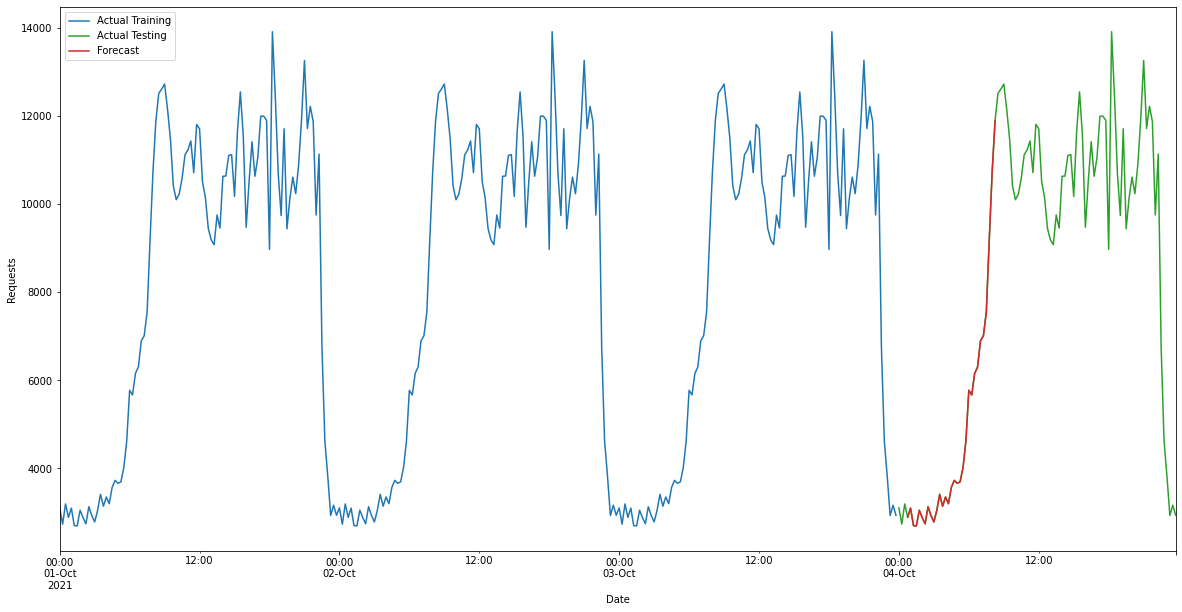

In [ ]:
ax = train.Total.plot(label='Actual Training', color='tab:blue')
ax = test.Total.plot(label='Actual Testing', color='tab:green')
pred.predicted_mean.plot(ax=ax, label='Forecast', color='tab:red')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.05)
ax.set_xlabel('Date')
ax.set_ylabel('Requests')
plt.legend()
plt.show()

In [ ]:
from numpy import sqrt
y_forecasted = pred.predicted_mean
y_truth = df.Total[291:329]
print(y_truth)



In [ ]:
import numpy as np

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    nrmse = rmse/np.abs(actual)               # NRMSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'nrmse':nrmse})

forecast_accuracy(y_forecasted, y_truth)


{'mae': 753.939176557173,
 'mape': 0.09637544163123092,
 'me': -3.078511360275091,
 'mpe': 0.011235291787290316,
 'nrmse': timeOfData
 2021-10-04 00:45:00    0.385735
 2021-10-04 01:00:00    0.359596
 2021-10-04 01:15:00    0.412584
 2021-10-04 01:30:00    0.413503
 2021-10-04 01:45:00    0.365374
                          ...   
 2021-10-04 22:45:00    0.240897
 2021-10-04 23:00:00    0.291649
 2021-10-04 23:15:00    0.380208
 2021-10-04 23:30:00    0.352098
 2021-10-04 23:45:00    0.379560
 Name: Total, Length: 93, dtype: float64,
 'rmse': 1114.3894470887371}

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_forecasted, y_truth, squared=False)

In [ ]:
y_truth.shape

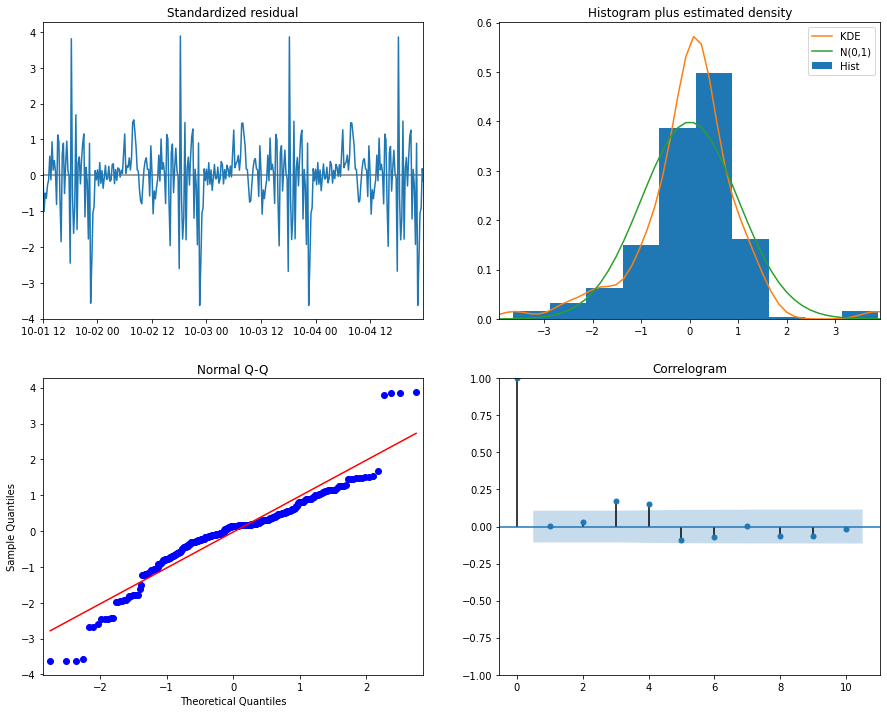

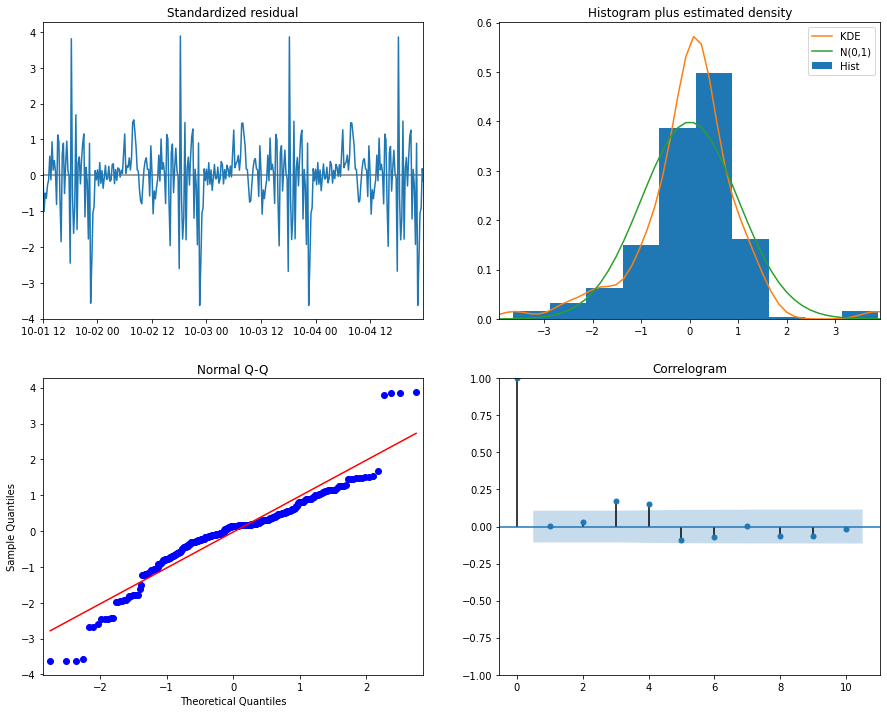

In [ ]:
results.plot_diagnostics(figsize=(15,12))

In [ ]:
import statsmodels.api as sm


#perform Ljung-Box test on residuals with lag=5
sm.stats.acorr_ljungbox(results.resid, lags=[1])

(array([0.16306639]), array([0.68634891]))

###WORKING MODEL###

In [ ]:
!pip install statsmodels==0.12.1

In [ ]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import statistics

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
from pandas.plotting import autocorrelation_plot
from sklearn.model_selection import KFold
from statsmodels.tsa.arima.model import ARIMA

from pandas import DataFrame

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


In [ ]:
#series = pd.read_csv('aggregatedhour - Copy.csv')
#series = series["Total"]

In [ ]:
series = pd.read_csv('/content/allapt_allmonth - Copy (2) - Copy.csv')
print(series)
#X= series["timeOfData"]
y = series["Total"]



In [ ]:
from statsmodels.tsa.stattools import acf
# Create Training and Test
#train = y[:94]
#test = y[94:]

In [ ]:
from statsmodels.tsa.stattools import acf
#X= series["timeOfData"]
y = series["Total"]
#y=z[0:96]
y = y.astype('float32')
# Create Training and Test
#train = y[0:100]
#test = y[100:102]
kf = KFold(n_splits=10)
KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(y):
  print("TRAIN:", train_index, "TEST:", test_index)
  train, test = y[train_index], y[test_index]

#test1 = test[0:2]
# Build Model
# model = ARIMA(train, order=(3,2,1))
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})  
model = ARIMA(train, order=(0, 1, 1))  
fitted = model.fit()  

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

# Forecast
fc, se, conf = fitted.forecast(38)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt

def evaluate_model(y, repeats): # Return factorial
    y = series["Total"]
    y = y.astype('float32')
    kf = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    for train_index, test_index in kf.split(y):
        train, test = y[train_index], y[test_index]
    
    #test1 = test[0:2]
    #print(test1)
    model = ARIMA(train, order=(0, 1, 1))  
    fitted = model.fit() 
    import warnings
    warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
    warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning) 
    # Forecast
    fc, se, conf = fitted.forecast(38)
    mape = np.mean(np.abs(fc - test.values))
    return mape

In [ ]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


z = series["Total"]
y = z[0:96]
y = y.astype('float32')

repeats = range(1,16)
results = list()
for r in range(1,11):
	# evaluate using a given number of repeats
	scores = evaluate_model(y, r)
	# summarize
	#print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
#print(results)
#pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
#pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecastin

In [ ]:
print(results)

[6159.325215708953, 5194.730578440421, 4942.0425446752, 5476.420293453151, 5523.831329548212, 5864.729183548793, 6043.129028146728, 5105.173477894619, 5636.9365501447055, 5092.075390247074]


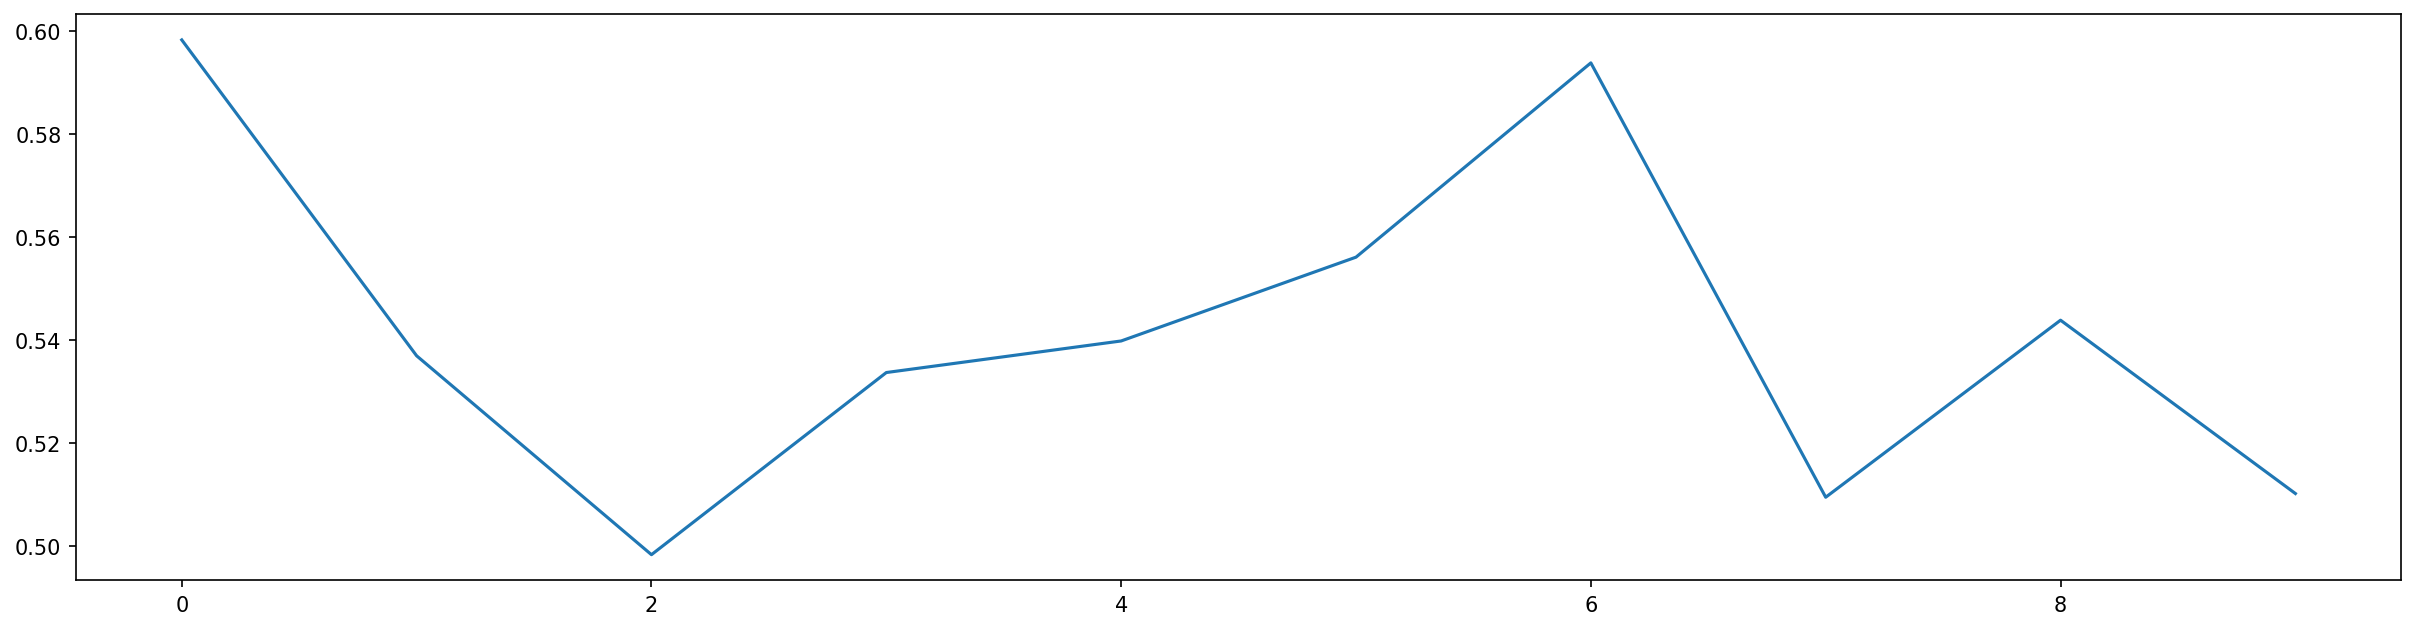

In [ ]:
#pyplot.boxplot(results, showmeans=True)
#pyplot.show()

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5), dpi=150)
plt.plot(results, color='tab:blue')
plt.show()

In [ ]:
print(mean(results))

465.2308054926747


In [ ]:
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Total   No. Observations:                  259
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2160.514
Method:                       css-mle   S.D. of innovations           1015.159
Date:                Thu, 12 May 2022   AIC                           4327.029
Time:                        16:30:18   BIC                           4337.699
Sample:                             1   HQIC                          4331.319
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            29.3975     57.350      0.513      0.608     -83.007     141.802
ma.L1.D.Total    -0.0912      0.058     -1.580      0.114      -0.204       0.022
                                    Root

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    nrmse = rmse/np.abs(actual)               # NRMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'nrmse':nrmse})

forecast_accuracy(fc, test1.values)


{'mae': 476.11305422211353,
 'mape': 0.04282871030810968,
 'me': -476.11305422211353,
 'mpe': -0.04282871030810968,
 'nrmse': array([0.04287441, 0.04280119], dtype=float32),
 'rmse': 476.20608525077654}

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 27.5 MB/s 


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

In [ ]:
model.resid()

array([ 3.104e+03, -3.700e+02,  4.590e+02, -3.040e+02,  2.100e+02,
       -3.980e+02, -6.000e+00,  3.550e+02, -1.660e+02, -1.410e+02,
        3.880e+02, -1.990e+02, -1.470e+02,  2.600e+02,  3.660e+02,
       -2.690e+02,  2.090e+02, -1.520e+02,  3.710e+02,  1.590e+02,
       -6.600e+01,  3.200e+01,  3.210e+02,  6.060e+02,  1.152e+03,
       -1.060e+02,  4.920e+02,  1.440e+02,  5.920e+02,  1.170e+02,
        5.350e+02,  1.626e+03,  1.552e+03,  1.167e+03,  6.250e+02,
        9.700e+01,  1.150e+02, -5.680e+02, -6.800e+02, -1.067e+03,
       -3.130e+02,  1.290e+02,  3.560e+02,  5.350e+02,  1.110e+02,
        2.040e+02, -7.200e+02,  1.095e+03, -9.800e+01, -1.203e+03,
       -3.610e+02, -7.010e+02, -2.590e+02, -1.080e+02,  6.730e+02,
       -2.960e+02,  1.176e+03,  5.000e+00,  4.670e+02,  1.900e+01,
       -9.490e+02,  1.477e+03,  8.960e+02, -9.980e+02, -2.075e+03,
        1.044e+03,  8.980e+02, -7.830e+02,  4.310e+02,  9.340e+02,
       -1.000e+00, -9.500e+01, -2.931e+03,  4.944e+03, -1.482e

In [ ]:
import statsmodels.api as sm


#perform Ljung-Box test on residuals with lag=5
sm.stats.acorr_ljungbox(model.resid, lags=[5], return_df=True)

TypeError: ignored

In [ ]:
j = statistics.stdev(train)

In [ ]:
a = fc + j
a2 = fc + j/2
a3 = fc + j/4
a4 = fc + j/10
b = fc - j

In [ ]:
stdplus_series = pd.Series(a, index=test.index)
stdplus_series2 = pd.Series(a2, index=test.index)
stdplus_series3 = pd.Series(a3, index=test.index)
stdplus_series4 = pd.Series(a4, index=test.index)
stdminus_series = pd.Series(b, index=test.index)

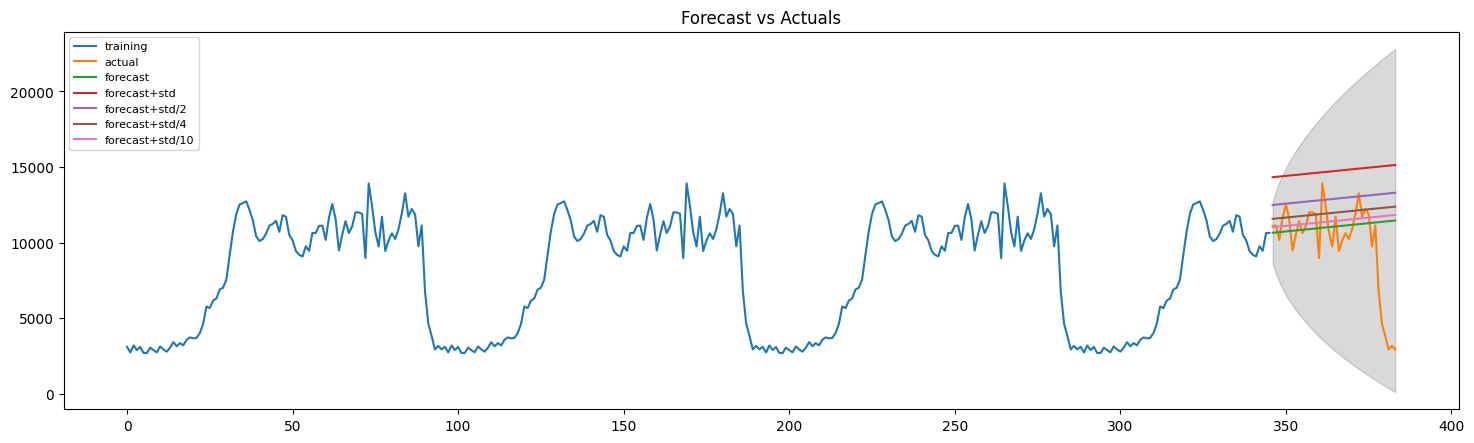

In [ ]:
# Plot
plt.figure(figsize=(18,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.plot(stdplus_series, label='forecast+std')
plt.plot(stdplus_series2, label='forecast+std/2')
plt.plot(stdplus_series3, label='forecast+std/4')
plt.plot(stdplus_series4, label='forecast+std/10')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

###SARIMA


In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/allapt_allmonth - Copy (2).csv')


In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data['timeOfData'], data['Total'])
plt.title('Quarterly EPS for Johnson & Johnson')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
plot_pacf(data['Total']);
plot_acf(data['Total']);

In [ ]:
data['Total'] = np.log(data['Total'])
data['Total'] = data['Total'].diff()
data = data.drop(data.index[0])

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data['Total'])
plt.title("Log Difference of Quarterly EPS for Johnson & Johnson")
plt.show()

In [ ]:
# Seasonal differencing
data['Total'] = data['Total'].diff(3)
data = data.drop([1, 2, 3], axis=0).reset_index(drop=True)

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data['Total'])
plt.title("Log Difference of Quarterly EPS for Johnson & Johnson")
plt.show()

In [ ]:
ad_fuller_result = adfuller(data['Total'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

In [ ]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
p = range(0, 3, 1)
d = 1
q = range(0, 3, 1)
P = range(0, 3, 1)
D = 1
Q = range(0, 3, 1)
s = 3
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

In [ ]:
result_df = optimize_SARIMA(parameters_list, 1, 1, 3, data['Total'])
result_df

In [ ]:
train1 = data['Total']
train = train1[0:191]
test = train1[191:200]
best_model = SARIMAX(train, order=(0, 1, 2), seasonal_order=(0, 1, 2, 3)).fit(dis=-1)
print(best_model.summary())

In [ ]:
model = SARIMAX(data['Total'], order=(0, 1, 2), seasonal_order=(0, 1, 2, 3)).fit(dis=-1)  
 

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

# Forecast
fc, se, conf= model.forecast(3)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
#                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
print(data)

In [ ]:
data['arima_model'] = best_model.fittedvalues
data['arima_model'][:3+1] = np.NaN
forecast = best_model.predict(start=data.shape[0], end=data.shape[0] + 6)
forecast = data['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='model')
plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(data['Total'], label='actual')
plt.legend()
plt.show()